In [31]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#plt.style.use("seaborn-white")
df = sns.load_dataset("mpg").drop("name", axis=1)

#df.head()
# model_year not ordinal
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Axes: xlabel='origin'>

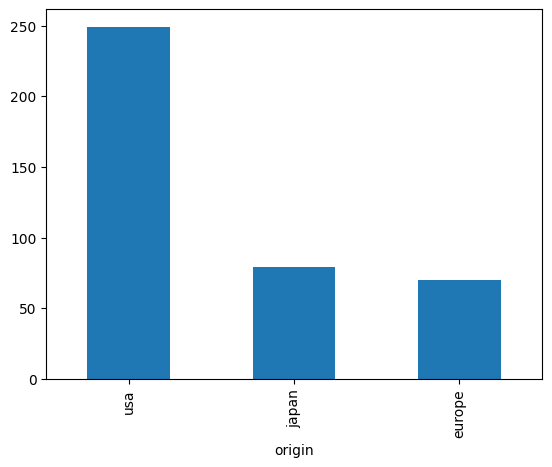

In [32]:
df["origin"].value_counts().plot(kind="bar")
# only 3 different categories


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [34]:
df.query('horsepower.isna()') 
# note that we coud use a regression model to fill in the missing values 
# if the error of the regression model isn't too large 

# to simplify we drop the NaNs 
df.dropna(inplace=True, axis = 0)


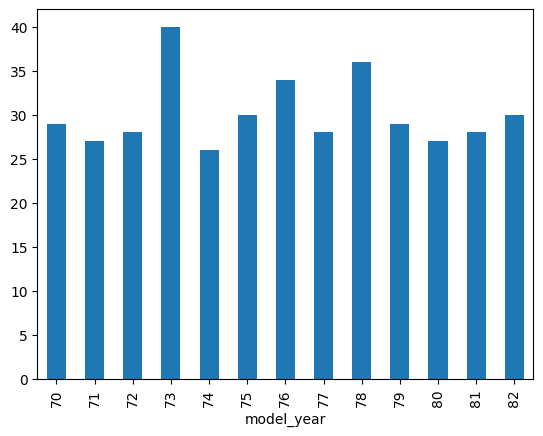

In [35]:
df["model_year"].value_counts().sort_index().plot(kind="bar");
# 13 categories -> one hot encode would create many more dimensions
# an idea is to group the years e.g. 70-73, 74-77, 78-82 or other group that could be useful if combined with
# domain knowledge

In [36]:
bins = pd.IntervalIndex.from_tuples([(69, 73), (74, 77), (78,83)])

df['model_year'] = pd.cut(df['model_year'], bins=bins)
df= pd.get_dummies(df, columns=["model_year", 'origin'], drop_first=True)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,"model_year_(74, 77]","model_year_(78, 83]",origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,False,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,False,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,False,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,False,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,False,False,False,True


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X, y = df.drop('mpg', axis=1).values, df['mpg'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
scaler = StandardScaler()

scaler_x_train = scaler.fit_transform(X_train)
scaler_x_test = scaler.transform(X_test)
X_train.shape, X_test.shape




((274, 9), (118, 9))

In [38]:
model = LinearRegression()
model.fit(scaler_x_train, y_train)
intecept, coef = model.intercept_, model.coef_

coef

array([-0.07963534,  0.71698622, -1.5802261 , -4.49219087, -0.08849455,
        0.36793355,  2.76523073,  0.02957218, -1.25074873])

In [44]:
import keras
from keras import layers
from keras.optimizers import SGD
inputs = keras.Input(shape=(X_train.shape[1],), name='input_layer')

outputs = layers.Dense(1, name= 'output_layer') (inputs)
model_shallow = keras.Model(inputs=inputs, outputs=outputs)

model_shallow = compile(loss='mean_squared_error', optimizer=SGD (learining_rate=.01) ) 

ValueError: Argument(s) not recognized: {'learining_rate': 0.01}

### Classification


In [ ]:
from sklearn.datasets import load_breast_cancer
import seaborn as sns

sns.set_style